# **The challenge**

---
**OVERVIEW**

The objective of this challenge is to explore **Model Steering** on an image generation model, specifically **Stable Diffusion**, using the **Activation Patching** technique. Participants will need to manipulate the model's behavior to inject the specific concept: **WINTER**.

---
**DESCRIPTION**


Context: Stable Diffusion

Stable Diffusion is a latent diffusion model capable of generating high-quality images from textual descriptions (text-to-image). Its complex architecture allows for fine control over the generation process. To understand how it works, let's break down its main components:


*   **Text Encoder:** This component is responsible for translating the input text prompt into a numerical representation (embedding) that the model can understand. It converts human language into a rich, condensed vector space that captures the semantic meaning of the prompt. This embedding guides the image generation process.
*   **U-Net:** The U-Net is the core of the diffusion process. It iteratively refines a noisy latent representation into a coherent image. It takes the noisy latent image and the text embedding (from the Text Encoder) as input. Through a series of convolutional and deconvolutional layers, it learns to denoise the image step by step, guided by the textual description. The U-Net's "U" shape allows it to capture both low-level details and high-level contextual information.
*   **Variational Autoencoder (VAE)**: The VAE has two main functions

 1.   **Encoder:** It compresses the original image into a smaller, latent representation. This is crucial because the diffusion process (handled by the U-Net) operates in this lower-dimensional latent space, which is computationally more efficient than working directly with high-resolution images.

 2.   **Decoder:** It takes the refined latent representation from the U-Net and reconstructs it back into a high-resolution image. Essentially, it translates the abstract latent code into the visual pixels we see.




---
**DATASET**

The dataset consists of a single CSV file containing 30 textual prompts. Each row pairs an ID with a short, descriptive scene.
These prompts will be used to generate the images for the submission.

## File description

Filename: `prompts.csv`

### Structure

| Column | Type    | Description                                      |
| ------ | ------- | ------------------------------------------------ |
| ID     | Integer | Unique prompt identifier (0–29)                  |
| prompt | String  | Textual prompt |

<br>



---
**EVALUATION**
**Generate 30 Modified Images and Upload for Evaluation:** After calculating the refusal vector, generate 30 images using the provided target prompts. Upload these images for evaluation. The evaluation will consider the presence of the generated concept, the coherence with the target prompt, and the perceptual quality of the image.


The submission file must be a CSV containing two columns: ID and images. The ID column should contain integers representing the prompt identifier, while the images column should contain the image from the diffusion model. Images need to be encoded as `base64`  strings. You can convert a PIL image to a base64 string using the following function:

```
def pil_image_to_string(img: Image.Image) -> str:
    """
    Convert a PIL image to a Base64-encoded string.
    
    Args:
        img: PIL.Image object.
    
    Returns:
        Base64 string representing the image.
    """
    buf = io.BytesIO()
    img.save(buf, format='PNG') # PNG for lossless compression
    return base64.b64encode(buf.getvalue()).decode('utf-8')
```



## Submission File
An example of a submission CSV is showed here:

    ID,images
    0,iVBORw0KGgoAAAANSddUh...
    1,AAgAAAAIACAIAAAB7GkOt...
    2,AAEAAElEQVR4nEy9y4IkR...
    etc.







# **NNsight tutorial (IMPORTANT)**


NNsight is a Python library that provides an intuitive and flexible interface for inspecting and **intervening in PyTorch models**. It allows you to easily **access activations**, gradients, and weights at any layer or token position, making it especially useful for interpretability and mechanistic analysis of neural networks. **NNsight simplifies the process** of understanding how models work internally by providing a concise, notebook-friendly syntax for hooking into model internals during forward and backward passes

Imports and model import
---

Install the NNsight library

In [ ]:
!pip install --no-deps nnsight
!pip install msgspec python-socketio[client]
!pip install ftfy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.2 MB/s eta 0:00:00


Load the model form huggingface (don't modify the model name)

In [ ]:
from nnsight.modeling.diffusion import DiffusionModel
import matplotlib.pyplot as plt
from math import ceil, sqrt
import PIL
import torch

MODEL_PATH = "stabilityai/stable-diffusion-2-1-base"
SEED = 17 # don't modify the seed (you'll be squalified)

model = DiffusionModel(
    MODEL_PATH,
    dispatch=True
).to("cuda")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

merges.txt: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/346 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/911 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

How to find the components
---



Helper function for visually explore the model components and structure, it takes in input a model component (or the model itself) and prints the tree of all the subcomponents.

If the input is a single component itself, it returns the component

In [ ]:
from rich.tree import Tree
from rich import print as rprint


def _root_label(module):
    if hasattr(module, "path") and isinstance(module.path, str):
        return module.path
    if hasattr(module, "_module") and module._module is not None:
        return module._module.__class__.__name__
    return module.__class__.__name__


def rich_tree(module, node=None):
    if len(list(module.named_children())) == 0:
        return repr(module)
    label = _root_label(module)
    if label == '':
      label = 'model'
    else:
      label = 'model' + label
    node = node or Tree(label)

    for child_name, child in module.named_children():
        branch_label = f"{child_name} : {_root_label(child)}"
        branch = node.add(branch_label)
        rich_tree(child, branch)

    return node

def print_model_components(model):
    tree = rich_tree(model)
    rprint(tree)


Try it !

In [ ]:
#print_model_components(model)
#print_model_components(model.vae)
#print_model_components(model.vae.encoder)
#print_model_components(model.vae.encoder.conv_in)
print_model_components(model.text_encoder.text_model.encoder.layers[0])

In [ ]:
print("Number of layers: ", len(model.text_encoder.text_model.encoder.layers))

Number of layers:  23


How to intercept the activations
---



Once you have chosen your component you can intercept the activations in the generation process using:

```
component.output.save()
```
N.B.: to use this function, you have to be inside the model’s generation context

```
  with model.generate(prompt,seed=SEED):
    GENERATION CONTEXT
```

In [ ]:
component = model.text_encoder.text_model.encoder.layers[2].mlp
prompt = 'your prompt'

with model.generate(prompt,seed=SEED):
  collected_activation = component.output.save()

print(collected_activation)

  0%|          | 0/50 [00:00<?, ?it/s]

tensor([[[ 0.0162, -0.0082, -0.0064,  ..., -0.0683,  0.0254, -0.0163],
         [-0.0154,  0.0834, -0.0844,  ..., -0.0379,  0.0247,  0.0792],
         [-0.0826,  0.0453,  0.0317,  ..., -0.0230,  0.0513, -0.0189],
         ...,
         [ 0.0167, -0.0024, -0.0717,  ..., -0.0596,  0.0254,  0.0844],
         [ 0.0130, -0.0079, -0.0653,  ..., -0.0586,  0.0206,  0.0811],
         [-0.0502,  0.0066, -0.0768,  ..., -0.0619, -0.0110,  0.1047]]],
       device='cuda:0')


In [ ]:
model.text_encoder.text_model.encoder.layers[1].mlp

CLIPMLP(
  (activation_fn): GELUActivation()
  (fc1): Linear(in_features=1024, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=1024, bias=True)
)

Helper function to get the MLP activations
---

The get_MLP_activations function returns the internal activations of all layers in the text encoder for each of the 77 token positions (note that the number of token positions is fixed, regardless of the input length).

If you inject the steering vectors back into the text encoder, make sure to insert them at the same positions within the 77 token slots.

get_MLP_activations returns a torch.Size([23, 77, 1024]) shaped torch Tensor:


*   **23 :** number of layers
*   **77 :** token positions
*   **1024 :** activation dimension



We encourage you to experiment by implementing your own function to extract embeddings from different stages of the model (such as during the diffusion process).

N.B.: Implementing a custom function that leverages activations from the diffusion process will earn you **extra points 🤑**.

In [ ]:
def get_MLP_activations(prompt): # INPUT = prompt (String), OUTPUT = torch.Size([23, 77, 1024]) activations (torch.Tensor)
  LAYERS = model.text_encoder.text_model.encoder.layers
  layers = []

  with model.generate(
    prompt,
    seed=SEED
    ):

    for layer in LAYERS:
      layers.append(layer.mlp.output.save())

  layers = torch.stack([l[0]for l in layers],dim = 0)
  return layers


How to get the generated image ?
---


That's the function to get the generated image given a prompt (no change in the internal activations)

  0%|          | 0/50 [00:00<?, ?it/s]

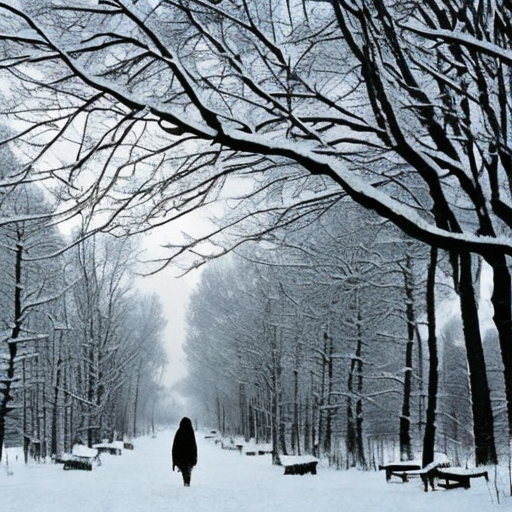

In [ ]:
prompt = 'the winter'
with model.generate(prompt,seed=SEED):
  image = model.output.images[0].save()

image



How to inject the activations back in the model
---




A basic example in which we zero out a specific MLP output

  0%|          | 0/50 [00:00<?, ?it/s]

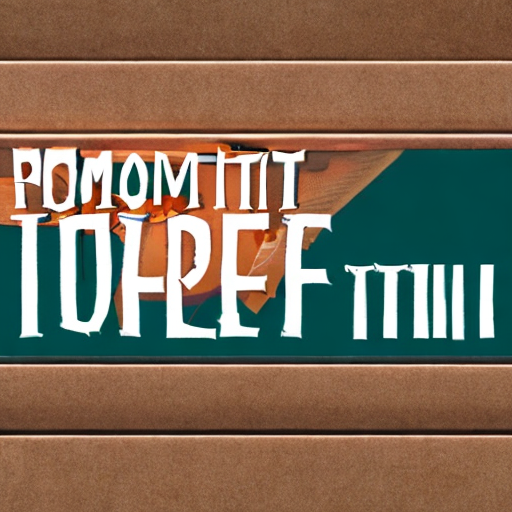

In [ ]:
selected_component = model.text_encoder.text_model.encoder.layers[4].mlp #select the component
prompt = "your prompt"

with model.generate(prompt,seed=SEED):
  selected_component.output[0][:] *= 0 #zeroing out the activation at that specific component
  image = model.output.images[0].save() #save the generated image

image

**STEERING !**
---


Given a dataset of positive prompt dataset $D_{pos}$ and a negative prompt dataset $D_{neg}$ you can compute a steering vector using the following formula:

$$\frac{1}{|D_{pos}|+|D_{neg}|} \sum_{i}{D_{pos}[i] - D_{neg}[i]}$$


In [ ]:
#EXAMPLE

layers = [0,6,7,8] # define the MLP we'll inject in
components = [model.text_encoder.text_model.encoder.layers[i].mlp for i in layers] # get the MLPs references
eps = [0.8, 0.5, 1, 2] # define the weights for rescaling the activations

#positive activations
positive_prompt = "the winter"
POSITIVE_mlp_activations = get_MLP_activations(positive_prompt) # get the activations of all the MLPs

#negative activations
negative_prompt = "the summer"
NEGATIVE_mlp_activations = get_MLP_activations(negative_prompt) # get the activations of all the MLPs

#compute the STEERING VECTOR
STEERING_VECTOR = ... #replace with the right steering vector computation

with model.generate(prompt,seed=SEED):

  for i,component in enumerate(components):
    component.output[0][:] += eps[i]*STEERING_VECTOR[i] # inject the rescaled steering vectors inside all the corrispondet layers
  image = model.output.images[0].save()

image


Don't stop to the text encoder !!

In [ ]:
prompt = "your prompt"
with model.generate(prompt,seed=SEED):
  UNNET_output_activations = model.unet.output[0].save() #Saving the activations of the UNET


  0%|          | 0/50 [00:00<?, ?it/s]

# **Challenge**

In [ ]:
#@title Prompts
winter_prompts = [
    "A forest covered in deep snow",
    "A mountain peak shining under bright snow",
    "Children playing in a field of falling snow"
]

summer_prompts = [
    "A green forest under bright sunlight",
    "A mountain peak under a clear blue sky",
    "Children playing in a sunny green field"
]

In [ ]:
#@title Choosing the layers and eps

import numpy as np

# CHOOSE LAYERS BETWEEN 0 and 22
layers = list(range(23))
num_layers = len(layers)
components = [model.text_encoder.text_model.encoder.layers[i].mlp for i in layers] # MLP references
eps = np.linspace(1.0, 5.0, num_layers)

In [ ]:
#@title MLP activations of the custom prompts

winter_activations = []
summer_activations = []

for i in range(len(winter_prompts)):
    # Compute winter prompt i
    winter_activations.append(get_MLP_activations(winter_prompts[i]))

    # Compute summer prompt i
    summer_activations.append(get_MLP_activations(summer_prompts[i]))

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
#@title Steering Vectors

num_samples = len(winter_activations)

# Sum differences
diff_sum = 0
for w, s in zip(winter_activations, summer_activations):
    diff_sum += w-s

# Compute Steering Vectors
steering_vectors = diff_sum / (2 * num_samples)

In [ ]:
#@title Load Challenge Prompts

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

challenge_prompts_csv = pd.read_csv('/content/drive/MyDrive/prompts.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


  0%|          | 0/50 [00:00<?, ?it/s]

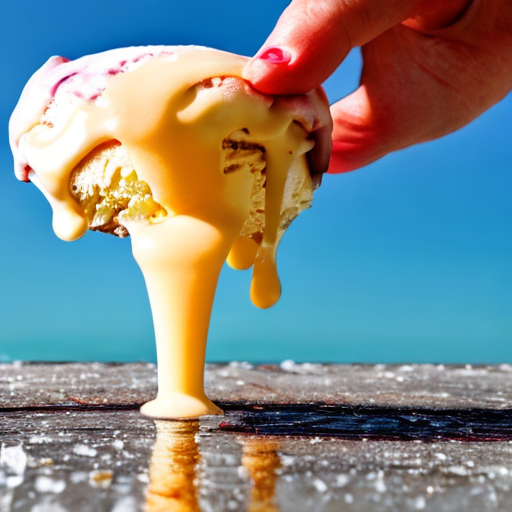

In [ ]:
#@title Show Original Images (Challenge Prompts)

challenge_prompts = list(challenge_prompts_csv.prompt)
prompt = challenge_prompts[1]
with model.generate(prompt,seed=SEED):
    image = model.output.images[0].save()

image

In [ ]:
challenge_prompts

['A family having a picnic in a sunny summer meadow',
 'A close-up of ice cream melting on a hot summer day',
 'A vibrant summer flower garden with butterflies',
 'A person reading a book under a summer oak tree',
 'A beach scene with summer umbrellas and waves',
 'A yellow lemonade stand on a summer afternoon',
 'A cyclist riding through a summer countryside road',
 'A pair of sunglasses on a summer-tiled patio',
 'A summer farmer’s market with fresh fruits on display',
 'A hammock strung between two trees in summer',
 'A street musician playing guitar on a summer evening',
 'A summer pool party with colorful floats',
 'A close-up of dewy grass on a summer morning',
 'A row of beach chairs facing the summer sea',
 'A picnic basket on a summer blanket in the park',
 'A family splashing in a summer river',
 'A summer carnival with bright lights at dusk',
 'A child running through a summer sprinkler',
 'A summer sunset over a calm lake',
 'A pair of flip-flops on hot summer sand',
 'A co

In [ ]:
#@title Function To Modify Forward Pass

# Define Hooks and handles
hook_functions = {}
handles = {}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
steering_vectors = [v.to(device) for v in steering_vectors]

for i, layer_num in enumerate(layers):
    def make_hook(layer_idx):
        def hook(module, input, output):
            output += eps[layer_idx] * steering_vectors[layer_idx]
            return output
        return hook

    hook_functions[layer_num] = make_hook(layer_num)

    target_layer = model.text_encoder.text_model.encoder.layers[layer_num].mlp
    handles[layer_num] = target_layer.register_forward_hook(hook_functions[layer_num])

# Generate output
with model.generate(prompt,seed=SEED):
    image = model.output.images[0].save()

# Remove handles
for l in handles:
    handles[l].remove()

image